In [1]:
from euv_fitting.calibrate.utils import SpeReader

S = SpeReader('../euv_fitting/calibrate/270.spe')
img = S.load_img()

print(f'Spectra has shape {img.shape}')
print('With metadata:')
S.print_metadata()

Spectra has shape (5, 2048)
With metadata:
gain: 3
adcrate: 6
adcresolution: 9
temp: 0.0
rawdate: 09Jan2020
rawtime: 114204
comments: ('', '', '', '', '')


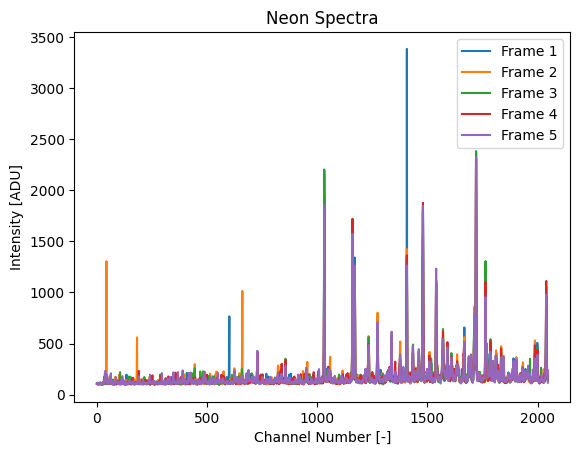

In [2]:
import matplotlib.pyplot as plt

plt.plot(img.T)
plt.xlabel('Channel Number [-]')
plt.ylabel('Intensity [ADU]')
plt.title('Neon Spectra')

plt.legend([f'Frame {i + 1}' for i in range(img.shape[0])])
plt.show()

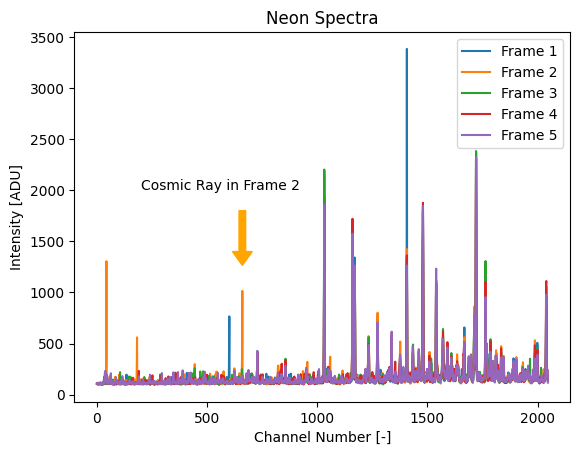

In [3]:
plt.plot(img.T)
plt.xlabel('Channel Number [-]')
plt.ylabel('Intensity [ADU]')
plt.title('Neon Spectra')

plt.legend([f'Frame {i + 1}' for i in range(img.shape[0])])

plt.arrow(660, 1800, 0, -400, width = 30, color = 'orange')
plt.text(200, 2000, 'Cosmic Ray in Frame 2')
plt.show()

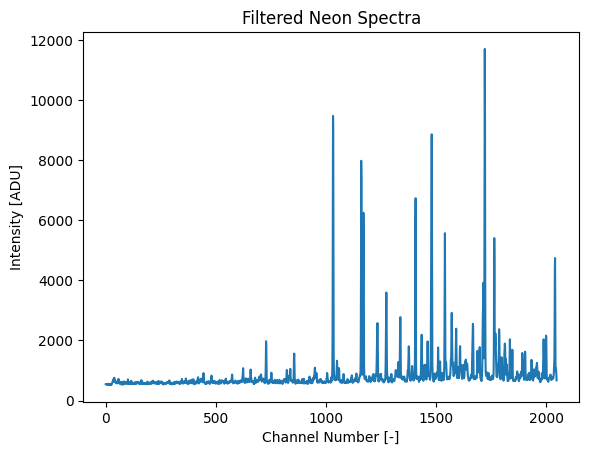

In [4]:
from euv_fitting.calibrate.utils import CosmicRayFilter

CRF = CosmicRayFilter()
img_filtered = CRF.apply(img)

plt.plot(img_filtered)
plt.xlabel('Channel Number [-]')
plt.ylabel('Intensity [ADU]')
plt.title('Filtered Neon Spectra')
plt.show()

In [5]:
from euv_fitting.calibrate.calibrators import Distance_Calibrator

Ne_Cal = Distance_Calibrator(img_filtered, 'Ne', num_peaks = 25)

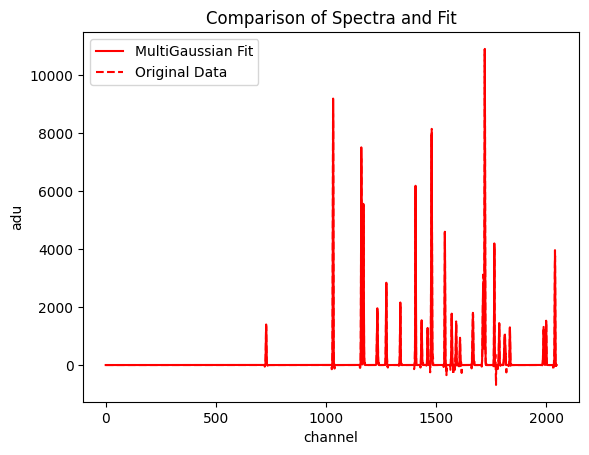

Printing information for the 6th peak fit.
[[1.40659451e+03 2.75744772e-02]
 [1.67844924e+04 4.89162106e+02]
 [1.08213360e+00 3.04436770e-02]]


In [6]:
Ne_Cal.multi.plot_fit()
print('Printing information for the 6th peak fit.')
print(Ne_Cal.multi.gauss_data[5, :, :])

selecting best peaks


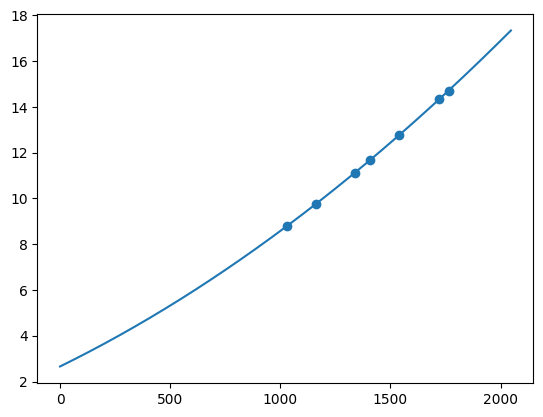

K0 = 2.658095554982152±0.05891793355062553
K1 = 0.004718422685678915±0.00013338296308877779
K2 = 1.2039248254098424e-06±9.865691255385293e-08
K3 = -2.7454680289512726e-12±2.386810238057546e-11
Highest/Average channel uncertainty 4.93e-04 / 2.63e-04
Highest/Average wavelength uncertainty 1.80e-03 / 7.06e-04
Systematic Uncertainty: 0
Chi-square: 0.9989862473518202


In [7]:
Ne_Cal.calibrate()
Ne_Cal.fit()
Ne_Cal.plot()
Ne_Cal.print_info()

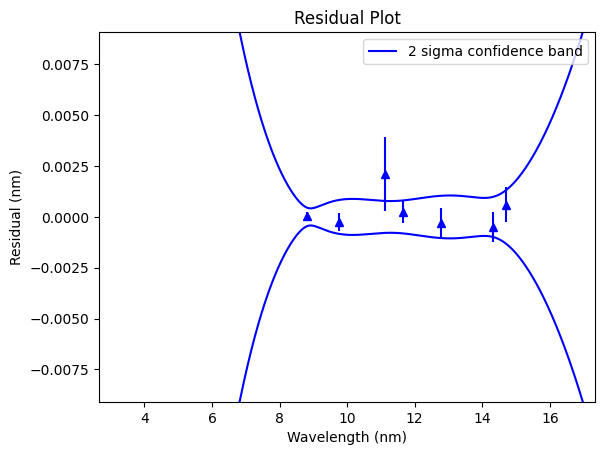

In [8]:
Ne_Cal.residual_plot()